In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import geopandas as gpd
import locale
import missingno as msno

locale.setlocale(locale.LC_ALL, 'es_CL')

plt.style.use("seaborn")
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.grid'] = False
sns.set(font_scale=1.5)

BASE = "/media/giani/Gianicosas/Magister/Proyecto/"

In [2]:
df = pd.read_csv(f"{BASE}work_data/matriz_desercion_2.csv.gz")
df.head()

/tmp/ipykernel_10511/1730194175.py:1: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{BASE}work_data/matriz_desercion_2.csv.gz")


,cat_periodo,codigo_unico,mrun,gen_alu,fec_nac_alu,anio_ing_carr_ori,tipo_inst_1,region_sede,valor_arancel,area_conocimiento,acreditada_carr,acreditada_inst,desertor_1,region_colegio,tipo_ensenanza_colegio,prom_notas_media,dependencia_colegio,cant_becas
0,2015,I498S6C132J2V1,37.0,1,197808,2015,Centros de Formación Técnica,Biobío,820000.0,Tecnología,NO ACREDITADA,ACREDITADA,0.0,NaN,NaN,NaN,NaN,0.0
1,2015,I111S14C309J2V1,118.0,1,199102,2015,Institutos Profesionales,Metropolitana,1390000.0,Administración y Comercio,ACREDITADA,ACREDITADA,0.0,13,310.0,4.975,3.0,0.0
2,2015,I106S3C64J4V1,253.0,1,198404,2015,Institutos Profesionales,Metropolitana,920000.0,Administración y Comercio,NO ACREDITADA,NO ACREDITADA,1.0,NaN,NaN,NaN,NaN,0.0
3,2015,I221S1C57J1V1,370.0,2,198910,2015,Centros de Formación Técnica,Metropolitana,1880000.0,Administración y Comercio,ACREDITADA,ACREDITADA,1.0,13,310.0,5.100,3.0,1.0
4,2015,I176S8C59J2V1,533.0,2,198309,2015,Institutos Profesionales,Coquimbo,1190000.0,Salud,ACREDITADA,NO ACREDITADA,0.0,4,510.0,5.200,2.0,0.0


In [10]:
df.groupby("cat_periodo").size()

cat_periodo
2015    185799
2016    310538
2017    384231
2018    445920
2019    476106
2020    460630
2021    483290
dtype: int64

# Exploración nulos

In [5]:
df.isna().sum() / df.shape[0] * 100

cat_periodo                0.000000
codigo_unico               0.000000
mrun                       0.000000
gen_alu                    0.000000
fec_nac_alu                0.000000
anio_ing_carr_ori          0.000000
tipo_inst_1                0.000000
region_sede                0.000000
valor_arancel              0.000000
area_conocimiento          0.000000
acreditada_carr            0.000000
acreditada_inst            0.000000
desertor_1                 0.000000
region_colegio            12.708874
tipo_ensenanza_colegio    12.708874
prom_notas_media          12.708874
dependencia_colegio       12.990394
cant_becas                 0.000000
dtype: float64

## Procesamiento

In [15]:
df["fec_nac_alu"] = df["fec_nac_alu"].replace([190001], [np.nan])
df["anio_ing_carr_ori"] = df["anio_ing_carr_ori"].replace([9995], [np.nan])
df["acreditada_carr"] = df["acreditada_carr"].str.strip().replace(["", "SIN INFORMACION"], [np.nan, np.nan])
df["acreditada_inst"] = df["acreditada_inst"].str.strip().replace([""], [np.nan])

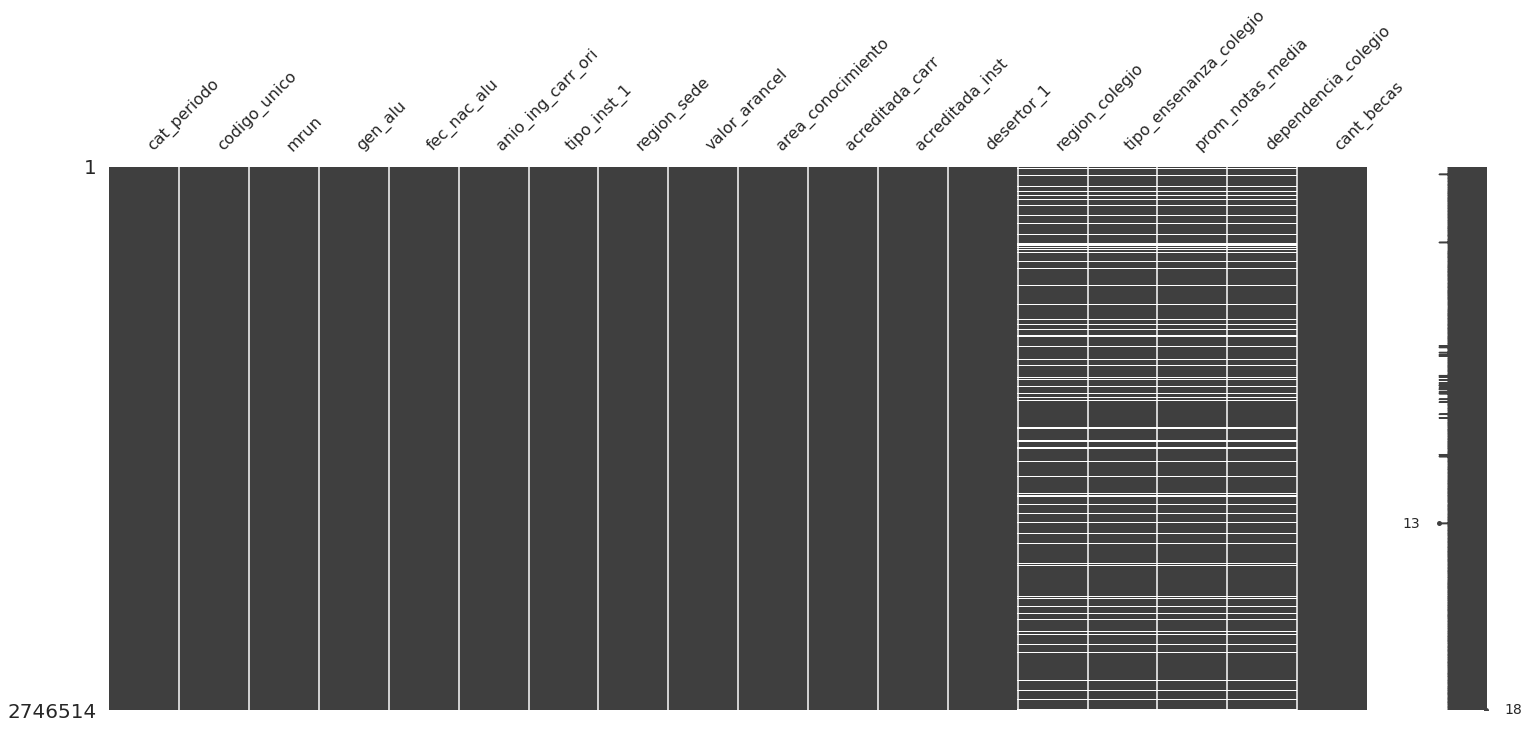

In [16]:
msno.matrix(df);

In [17]:
df.isna().sum() / df.shape[0] * 100

cat_periodo                0.000000
codigo_unico               0.000000
mrun                       0.000000
gen_alu                    0.000000
fec_nac_alu                0.001493
anio_ing_carr_ori          0.000000
tipo_inst_1                0.000000
region_sede                0.000000
valor_arancel              0.000000
area_conocimiento          0.000000
acreditada_carr            0.000000
acreditada_inst            0.000000
desertor_1                 0.000000
region_colegio            12.708874
tipo_ensenanza_colegio    12.708874
prom_notas_media          12.708874
dependencia_colegio       12.990394
cant_becas                 0.000000
dtype: float64

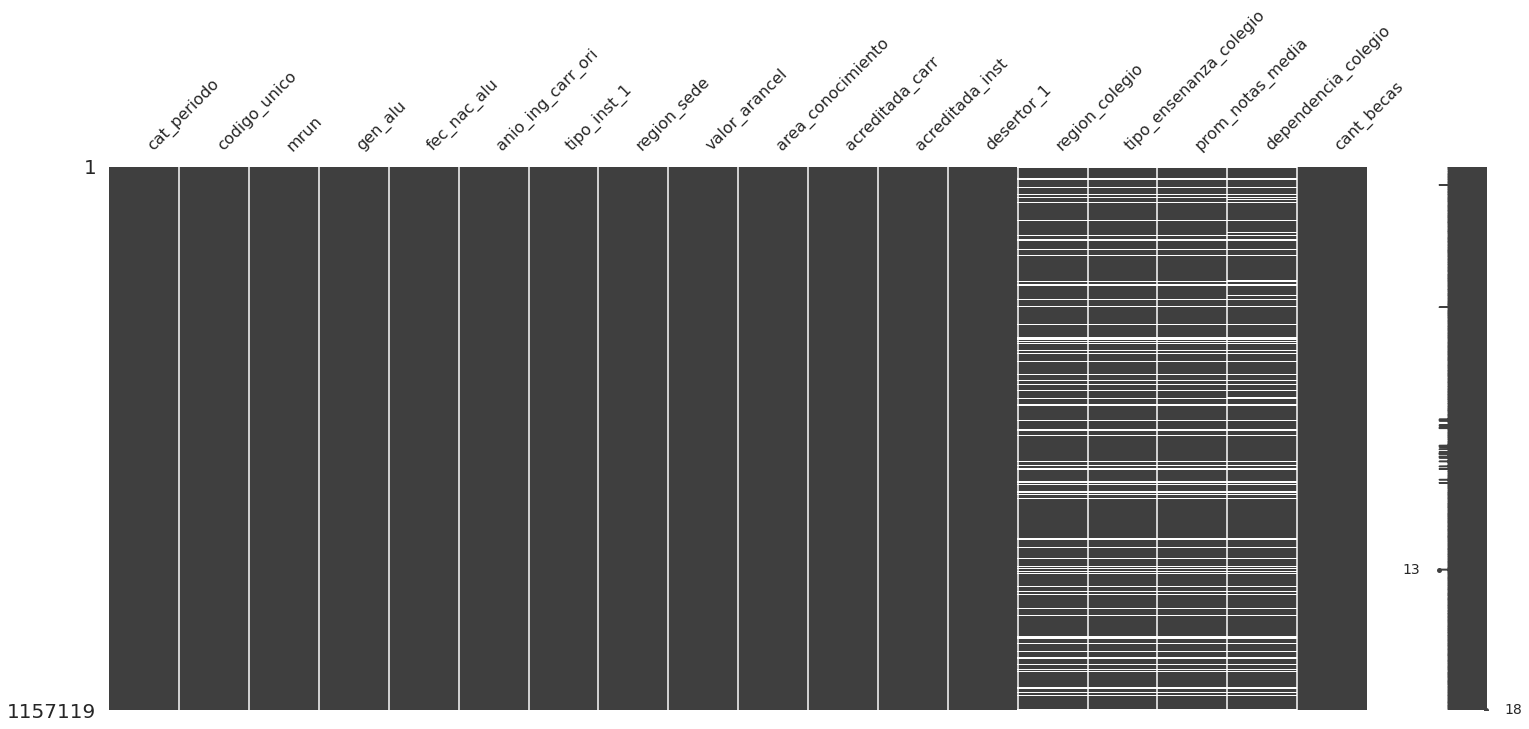

In [50]:
ruts_unicos = df.drop_duplicates(subset=["mrun"])
msno.matrix(ruts_unicos);

In [51]:
ruts_unicos.isna().sum() / ruts_unicos.shape[0] * 100

cat_periodo                0.000000
codigo_unico               0.000000
mrun                       0.000000
gen_alu                    0.000000
fec_nac_alu                0.002420
anio_ing_carr_ori          0.000000
tipo_inst_1                0.000000
region_sede                0.000000
valor_arancel              0.000000
area_conocimiento          0.000000
acreditada_carr            0.000000
acreditada_inst            0.000000
desertor_1                 0.000000
region_colegio            13.876706
tipo_ensenanza_colegio    13.876706
prom_notas_media          13.876706
dependencia_colegio       14.192922
cant_becas                 0.000000
dtype: float64

## Exploración variables en datos nulos

In [53]:
df_nan = ruts_unicos[ruts_unicos.isna().any(axis=1)].copy().dropna(subset=["fec_nac_alu"])

In [54]:
df_nan["anio_nac_alu_mas_18"] = df_nan["fec_nac_alu"].astype(str).str[:4].astype(int) + 18
df_nan["anio_nac_alu_mas_18"].describe()

count    164208.000000
mean       1996.563919
std           8.177410
min        1948.000000
25%        1992.000000
50%        1997.000000
75%        2000.000000
max        2022.000000
Name: anio_nac_alu_mas_18, dtype: float64

In [55]:
perdidos = df_nan[df_nan["anio_nac_alu_mas_18"] < 1992]
perdidos.shape[0] / df_nan.shape[0] * 100

23.609081165351263

In [56]:
perdidos.shape[0] / df.shape[0] * 100

1.4115347673450782

In [63]:
pd.DataFrame(perdidos["region_sede"].value_counts("%") * 100,).rename(columns={"region_sede": "% matriculados sin info colegio"})

,% matriculados sin info colegio
Metropolitana,61.285080
Valparaíso,9.309224
Biobío,8.963578
Maule,3.213991
Coquimbo,2.925093
Lib. Gral B. O'Higgins,2.321502
Los Lagos,2.306026
La Araucanía,2.228642
Antofagasta,2.048081
Ñuble,1.617313


In [64]:
df.dropna()["region_sede"].value_counts("%") * 100

Metropolitana             46.358248
Valparaíso                10.059149
Biobío                     9.410411
Maule                      5.313939
Coquimbo                   4.547446
Lib. Gral B. O'Higgins     4.463419
Los Lagos                  4.283063
La Araucanía               4.273229
Antofagasta                3.171089
Ñuble                      2.081001
Los Ríos                   1.541146
Tarapacá                   1.316768
Arica y Parinacota         1.203407
Atacama                    0.973798
Magallanes                 0.656522
Aysén                      0.347364
Name: region_sede, dtype: float64